In [ ]:
# script que implementa FinaleToolkit para análisis fragmentómico
# https://github.com/epifluidlab/FinaleToolkit
# autora: suarezhs@uoc.edu

El pipeline se ha instalado previamente en conda. El environment está disponible en el repositorio (environment.yaml).

In [ ]:
#!conda install -c bioconda -c conda-forge finaletoolkit

# Importar datos

In [3]:
# settings generales

# working directory to root folder
import os
#os.chdir('/mnt/scratch_dir/suarezhs/tfm/bcltofragmentomics/')
os.chdir('/Users/sarasuarez/Desktop/bcltofragmentomics')

# output directories
# datos procesddos (QC) - en root (donde data folder)
data_qcdir = '../data/alignments_qc'

# resultados
results_frag = 'results/01_fragment_lengths'
results_endmot = 'results/02_endmotifs'

# crearlos
os.makedirs(data_qcdir, exist_ok=True)
os.makedirs(results_frag, exist_ok=True)
os.makedirs(results_endmot, exist_ok=True)

In [4]:
os.getcwd()

'/Users/sarasuarez/Desktop/bcltofragmentomics'

In [ ]:
# en terminal
#finaletoolkit frag-length-bins \
#   ../data/alignments/POOL-473N/L-25000010_S5.bam \
#   -min 50 \
#   -max 300 \
#   --bin-size 1 \
#   -q 30 \
#   > L-25000010_S5_fraglengths.tsv

In [2]:
# que hay en el paquete porque no encuento documentacion que no sea
# para el command line

import finaletoolkit as ftk
import pkgutil
import importlib

for m in pkgutil.iter_modules(ftk.__path__):
    print(m.name)

submodules = ["cli", "frag", "genome", "utils", "version"]

for sm in submodules:
    print("\n### Submodule:", sm)
    mod = importlib.import_module(f"finaletoolkit.{sm}")
    print(dir(mod))

ModuleNotFoundError: No module named 'finaletoolkit'

In [43]:
import finaletoolkit.frag as frag

#help(frag.frag_length_bins)

help(frag.end_motifs)

Help on function end_motifs in module finaletoolkit.frag._end_motifs:

end_motifs(input_file: 'str', refseq_file: 'str | Path', k: 'int' = 4, min_length: 'int | None' = 50, max_length: 'int | None' = None, both_strands: 'bool' = True, negative_strand: 'bool' = False, output_file: 'None | str' = None, quality_threshold: 'int' = 30, workers: 'int' = 1, verbose: 'bool | int' = False, fraction_low: 'int | None' = None, fraction_high: 'int | None' = None) -> 'EndMotifFreqs'
    Function that reads fragments from a BAM, CRAM, or tabix indexed
    file and returns the 5' k-mer (default is 4-mer) end motif
    frequencies as a dictionary. Optionally writes data to a tsv. This
    function reproduces the methodology of Zhou et al (2023).

    Parameters
    ----------
    input_file : str
        BAM, CRAM, or Frag.gz file with paired-end reads.
    refseq_file : str or Path
        2bit file with sequence of reference genome input_file is
        aligned to.
    k : int, optional
        Lengt

# QC

* Crea carpeta en data/alignments_qc
* Runneado aquí pero mover como script
* **QUITAR CONTEO INCLUIDO/EXCLUIDO PARA BARPLOT**

In [ ]:
# # head of bam file
# import os
# import glob
# import pysam # leer bam en python
# import matplotlib.pyplot as plt
# import numpy as np
# import time

# # este codigo aplica QC y genera barplot de lecturas incluidas/excluidas

# start = time.time()

# # path archivos bam
# data_bamsdir = glob.glob("../data/alignments/POOL-*/*.markdup.bam")

# # bams a analizar (no vacios) - esto es temporar ya que deberian de haberse ignorado en el alineamiento
# bams_lecturas = []

# for filepath in data_bamsdir:
#     # guardo nombre sample (base del path) sin markdup.bam
#     samplename = os.path.basename(filepath).replace('.markdup.bam', '')
    
#     # si no es muestra a excluir (vacia)
#     if not re.match(r"^ID([1-9]|1[0-9]|2[0-4])_", samplename):
#         # anyado a bam con lecturas
#         bams_lecturas.append(filepath)

# total_files = len(bams_lecturas)

# #sample_list = []
# included_counts = []
# excluded_counts = []

# for i, filepath in enumerate(bams_lecturas, start=1):

#     # guardo nombre sample (base del path) sin markdup.bam
#     samplename = os.path.basename(filepath).replace('.markdup.bam', '')

#     # anyado a lista
#     #sample_list.append(sample)

#     # conteo de pares de lecturas includias/exclusiodas
#     included = 0
#     excluded = 0

#     # crear output qc file a escribir
#     out_bam_path = os.path.join(data_qcdir, samplename + ".filtered.bam")

#     # y escribir cada lectura (los pares que han pasado el filtro)
#     print(f'Leyendo y filtrando archivo .markdup.bam #{i}/{total_files} y escribiendo en: {out_bam_path}\n')
        
#     # leer bam u escribir filtered.bam correspondiente
#     with pysam.AlignmentFile(filepath, "rb") as bam, pysam.AlignmentFile(out_bam_path, "wb", header=bam.header) as out_bam:

#         # para cada lectura hasta el final (until_eof=T)
#         for read in bam.fetch(until_eof=True):

#             # excluir si se cumple cualquiera de estas reglas
#             if (
#                 read.is_unmapped or # lectura no mapeada
#                 read.mate_is_unmapped or # par de lecturas no alineada ok
#                 read.is_duplicate or # lectura esta duplicada
#                 not read.is_proper_pair or # lectura no esta emparejada
#                 read.mapping_quality <= 30 # la calidad del alineamiento es baja
#             ):
#                 # si es read1 - anyadir a lista excluir (solo contar el par como 1)
#                 if read.is_read1:
#                     excluded += 1
#                 # si no seguir
#                 continue
            
#             out_bam.write(read)

#             # si es read1 y ha pasado el filtro, anyadimos la lectura (representante
#             # del par) a lista incluidas
#             if read.is_read1:
#                 included += 1

#     # anyadimos las lecturas a la lista respectiva
#     included_counts.append(included)
#     excluded_counts.append(excluded)
    
#     # crear bai (necesario para FinaleToolkit
#     pysam.index(out_bam_path)    


# end = time.time()

# # imprimo tiempo de computacion
# print(f"Tiempo total: {end - start/60:.2f} minutos")

In [ ]:
results_filesdir

# FinaleToolKit

## Longitud de fragmentos (una carpeta por ahora)

* Generar tsv a partir de .markdup.bam (antes de QC) y filtered.bam (despues de QC) para histogramas
* En HPC por velocidad: script *01_fragment_lengths.py*

In [ ]:
# script 01_fragment_lengths.py
# bsub -o out_fraglength.txt -e err_fraglength.txt -q bio -n 2 -W 2800 -M 64000 -hl -R 'rusage[mem=64000]' python scripts/01_fragment_lengths.py

**TSV-frag_length_bins():**

In [5]:
results_frag

'results/01_fragment_lengths'

In [4]:
import pandas as pd
pd.read_csv(os.path.join(results_frag, "L-25000010_S5.markdup.tsv"), 
                         index_col=None, 
                         sep='\t').head()

,min,max,count
0,78,78,2426
1,79,79,3117
2,80,80,3601
3,81,81,6597
4,82,82,5500


**HISTOGRAMA-frag_length_bins():** ejemplo histogramas pre-QC

In [ ]:
# from finaletoolkit.frag import frag_length_bins 
# for filename in glob.glob("../data/alignments/POOL-527N/*.markdup.bam"):
#     #print(os.path.basename(filename)) # basename extrae filename del filename
#     # guardo samplename quitando la extension
#     samplename = os.path.basename(filename).replace(".markdup.bam", "")
#     print(samplename)
#     frag_length_bins(input_file=filename,
#                      bin_size=1,
#                      min_length=50, 
#                      max_length=300,
#                      quality_threshold=30,
#                      output_file=os.path.join(results_filesdir, samplename + ".tsv"),
#                      histogram_path=os.path.join(results_plotdir, samplename + ".png")
#                     )

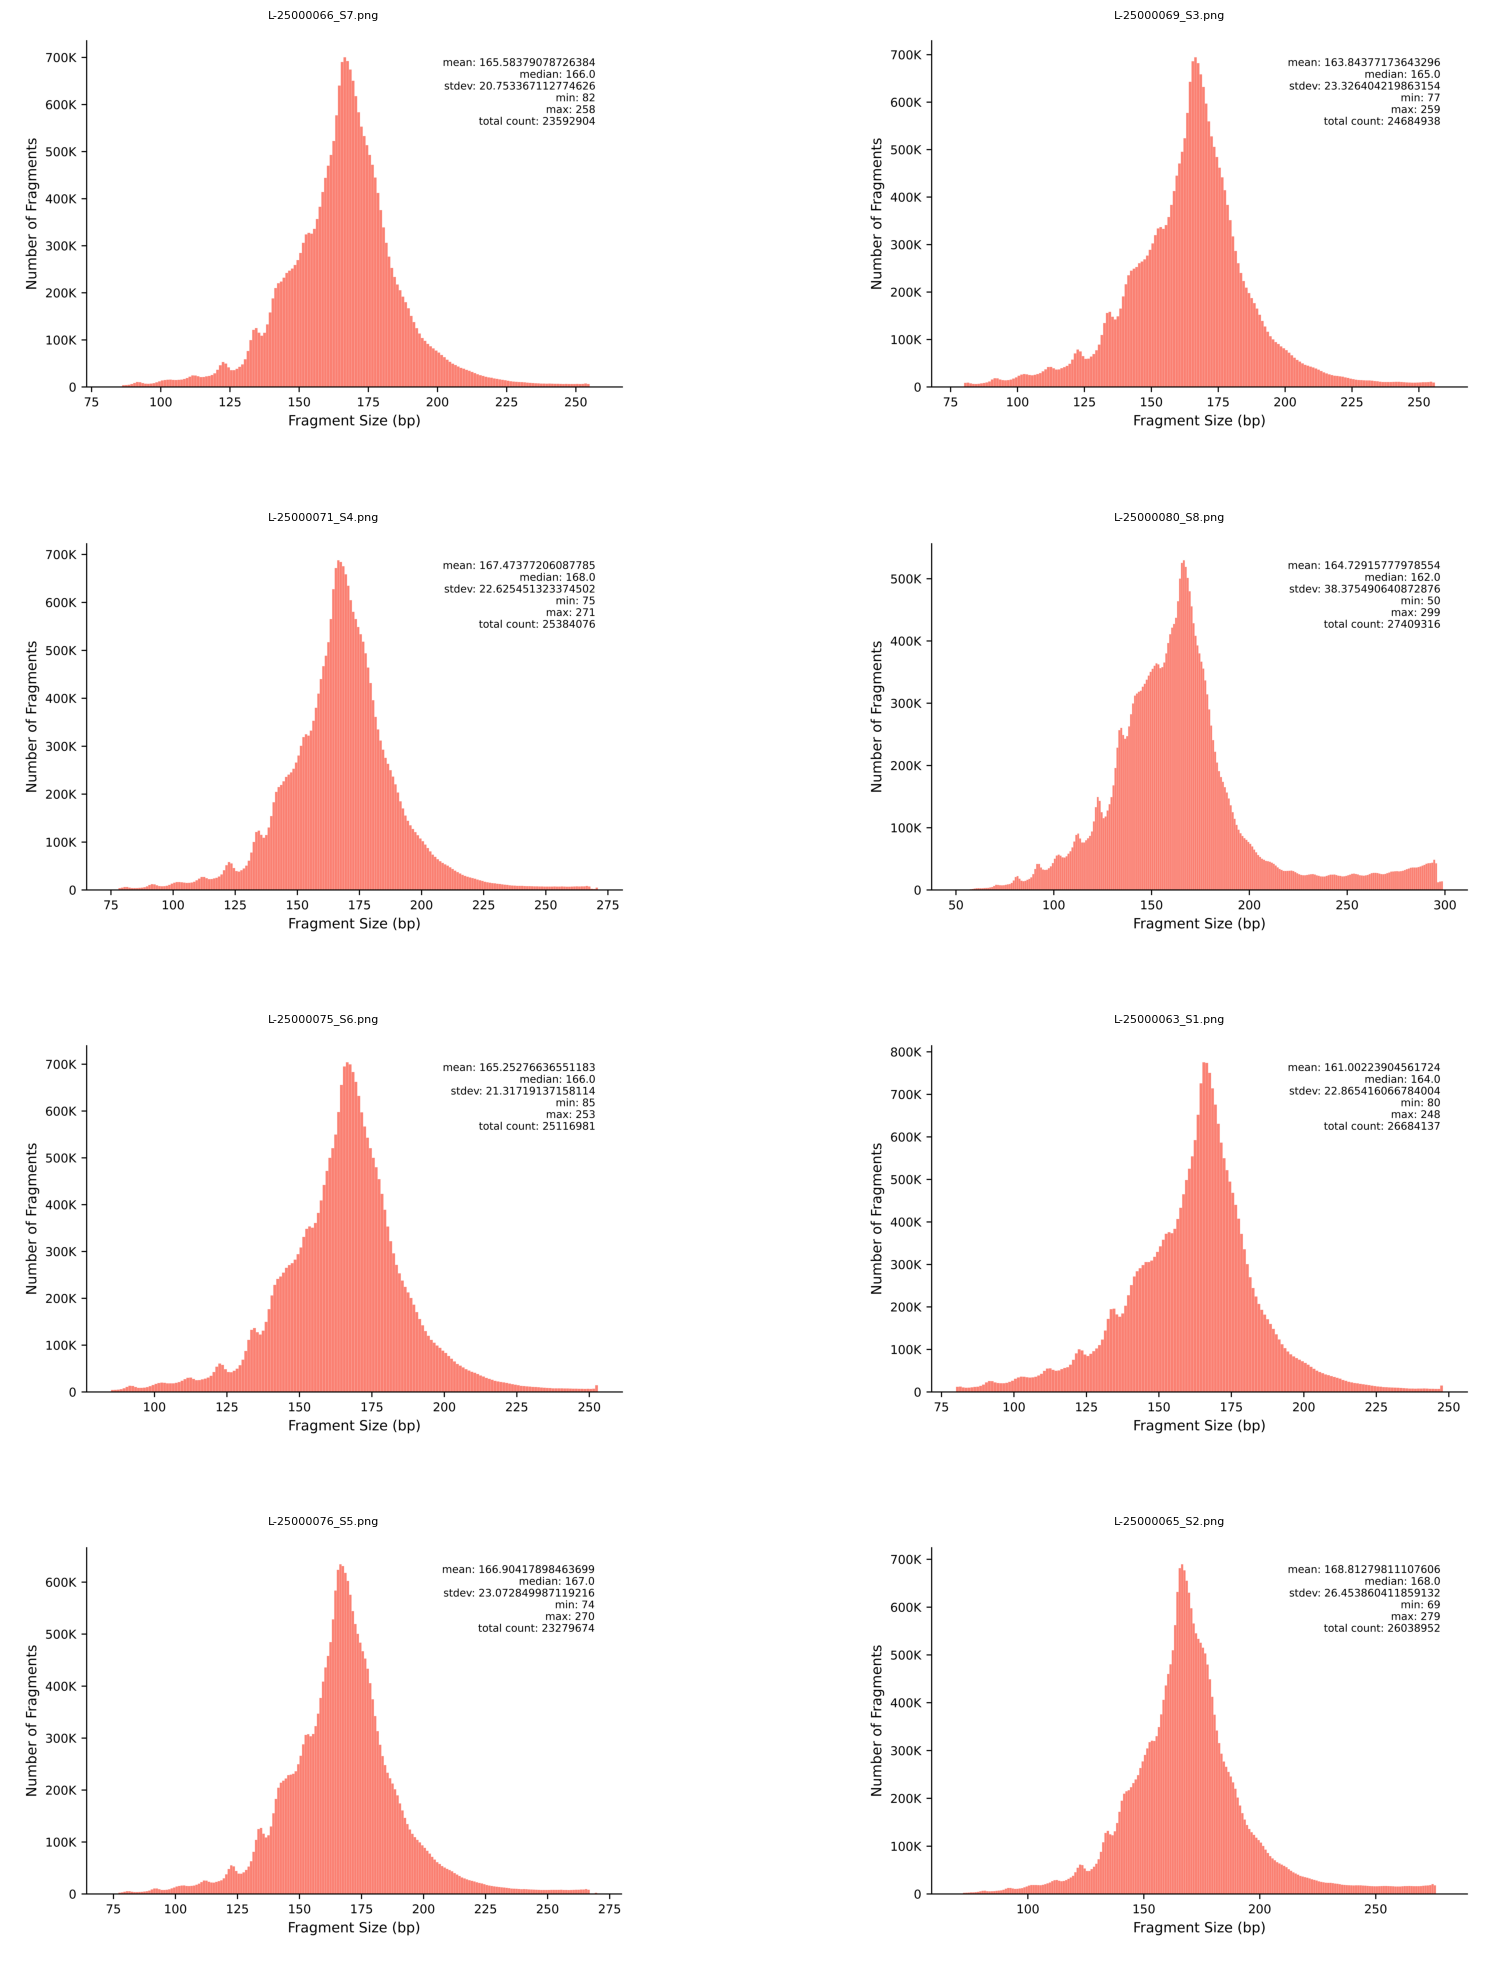

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pngfiles = glob.glob('results/plots/*.png')

# defino panel 
fig, axes = plt.subplots(4, 2, figsize=(20, 25))

# Flatten axes array for easy iteration
axes = axes.flatten()

# iteramos en axis e imagenes
for ax, img_path in zip(axes, pngfiles):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis("off")  # no ticks or frames

    # saco el nombre
    fname = os.path.basename(img_path)

    # cogo lo de antes de .bam
    title = fname.split(".bam")[0]

    # Set the subplot title
    ax.set_title(title, fontsize=8)

**HISTOGRAMA-frag_length_bins():** ejemplo histogramas pre-QC

**NOTA: AUN NO ESTAN LOS MISMOS ARCHIVOS FILTRADOS**

In [5]:
import os
import glob
import pysam # leer bam en python
import matplotlib.pyplot as plt
import numpy as np
import time

list_pool527 = []
for filename in glob.glob("../data/alignments/POOL-527N/*.markdup.bam"):
     #print(os.path.basename(filename)) # basename extrae filename del filename
     # guardo samplename quitando la extension
     samplename = os.path.basename(filename).replace(".markdup.bam", "")
     #print(samplename)
     list_pool527.append(samplename)

print(list_pool527)

[]


In [7]:
list_pool527 = ['L-25000063_S1', 'L-25000080_S8', 'L-25000065_S2', 'L-25000071_S4', 'L-25000075_S6', 'L-25000076_S5', 'L-25000069_S3', 'L-25000066_S7']
list_pool527

['L-25000063_S1',
 'L-25000080_S8',
 'L-25000065_S2',
 'L-25000071_S4',
 'L-25000075_S6',
 'L-25000076_S5',
 'L-25000069_S3',
 'L-25000066_S7']

['results/01_fragment_lengths/L-25000065_S2.filtered.png', 'results/01_fragment_lengths/L-25000066_S7.filtered.png', 'results/01_fragment_lengths/L-25000075_S6.filtered.png', 'results/01_fragment_lengths/L-25000069_S3.filtered.png', 'results/01_fragment_lengths/L-25000063_S1.filtered.png', 'results/01_fragment_lengths/L-25000080_S8.filtered.png', 'results/01_fragment_lengths/L-25000076_S5.filtered.png', 'results/01_fragment_lengths/L-25000071_S4.filtered.png']


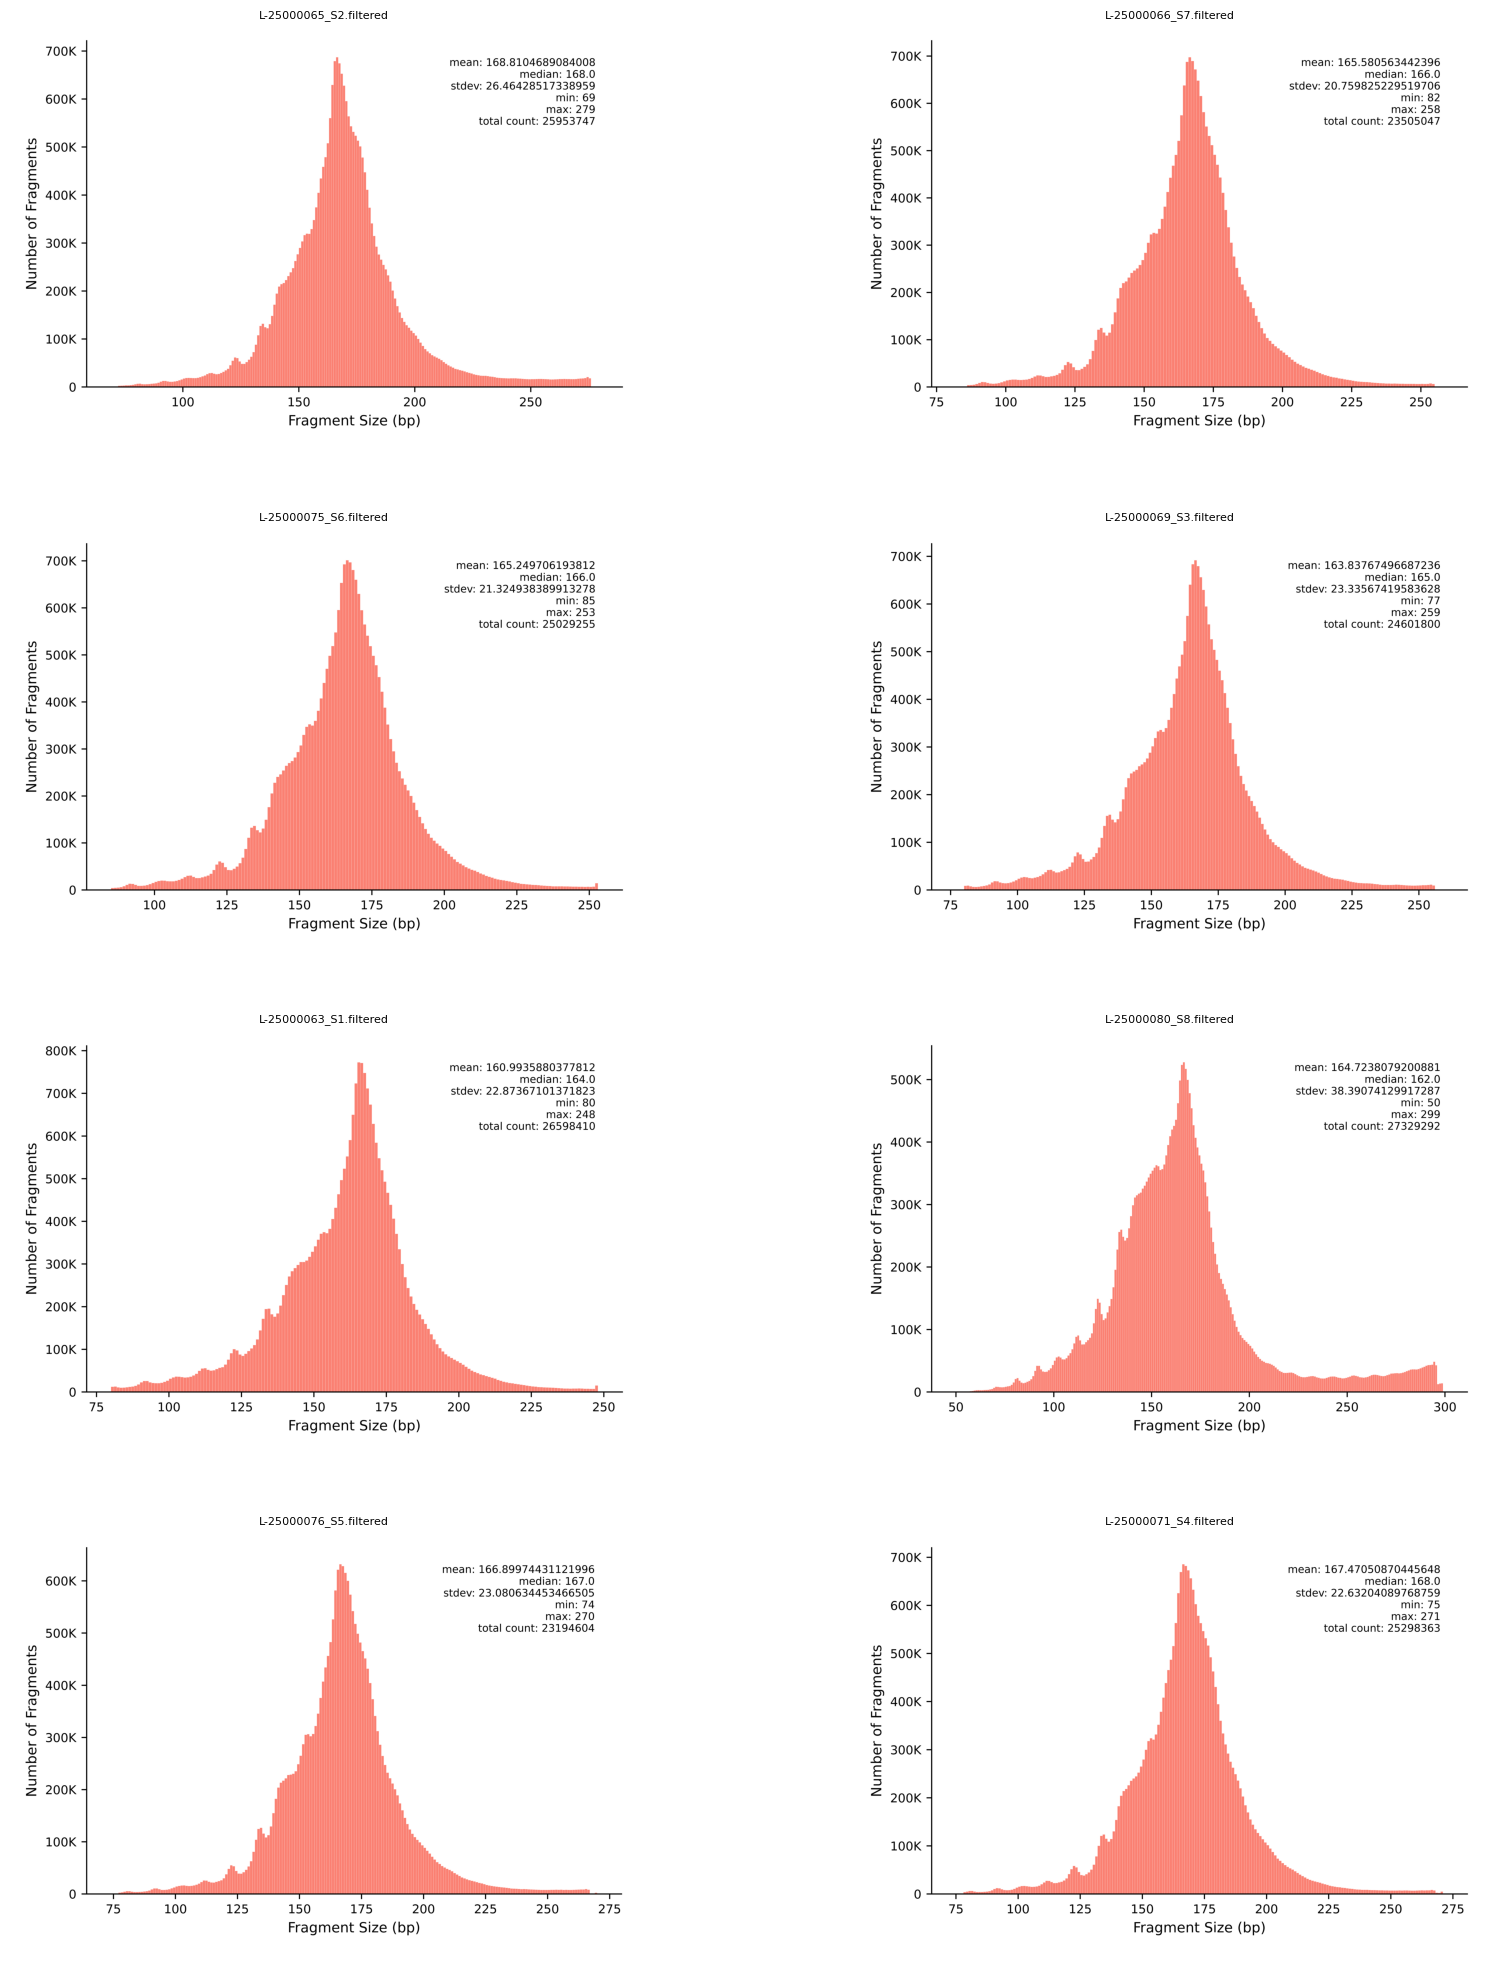

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# defino panel 
fig, axes = plt.subplots(4, 2, figsize=(20, 25))

# flatten ejes
axes = axes.flatten()

# lista a rellenar con archivos de pool-527
pngfiles = []

for filename in glob.glob("results/01_fragment_lengths/*.filtered.png"):
    
    samplename = os.path.basename(filename).replace(".filtered.png", "")
    #print(samplename)
    #print(os.path.basename(filename))
    
    if samplename in list_pool527:
        #print(samplename)

        # anyadir filename entero a lista
        pngfiles.append(filename)

print(pngfiles)

# iteramos en axis e imagenes
for ax, img_path in zip(axes, pngfiles):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis("off")  # no ticks or frames

    # saco el nombre
    fname = os.path.basename(img_path)

    # cogo lo de antes de .png para identificar filtrado
    title = fname.split(".png")[0]

    # titulo
    ax.set_title(title, fontsize=8)

* Vemos que hay distinta amplificación de fragmentos de diferentes tamaños (la mayoría de lecturas en fragmentos con tamaño medio/modal). Por esto, los duplicados tampoco estan uniformemente distribuidos a lo largo de los fragmentos y necesitaremos calcular la frequencia relativa para poder comparar la distribución de fragmentos antes y después del QC.

## Comandos Git ignorar reference file

In [ ]:
#git rm --cached hg38.2bit
#git remote add origin git@github.com:sara-suarez93/bcltofragmentomics.git
#git push --force
#git push --set-upstream origin main
#git push --force

## Motivos de corte

In [ ]:
# script 01_fragment_lengths.py
# bsub -o logs_hpc/out_endmot.txt -e logs_hpc/err_endmot.txt -q bio -n 1 -W 2800 -M 64000 -hl -R 'rusage[mem=64000]' python scripts/02_endmotifs.py

# QC

## Histogramas conteos

In [231]:
# uno .tsv pre- y post-qc
df_fraglen = []

for f in glob.glob("results/01_fragment_lengths/*.tsv"):
    df = pd.read_csv(f, sep="\t")

    sample = os.path.basename(f).split(".")[0]
    #print(sample)
    qc = "post" if "filtered" in f else "pre"

    df["sample"] = sample
    df["qc"] = qc

    df_fraglen.append(df)

df_fraglen = pd.concat(df_fraglen, ignore_index=True)

df_fraglen.head()

,min,max,count,sample,qc
0,65,65,4,L-25000049_S4,post
1,66,66,870,L-25000049_S4,post
2,67,67,987,L-25000049_S4,post
3,68,68,1173,L-25000049_S4,post
4,69,69,10416,L-25000049_S4,post


In [232]:
# frecuencia relativa - numero de fragmentos de x tamanyo/numero total por muestra
df_fraglen["rel_freq"] = (
    df_fraglen["count"] /
    # suma numero total para cada muestra
    df_fraglen.groupby(["sample", "qc"])["count"].transform("sum")
)


df_fraglen["scaled_freq"] = (
    # min-media/std
     (df_fraglen["rel_freq"]- df_fraglen.groupby("min")["rel_freq"].transform("mean")) / 
    df_fraglen.groupby("min")["rel_freq"].transform("std")
)


df_fraglen.head()

,min,max,count,sample,qc,rel_freq,scaled_freq
0,65,65,4,L-25000049_S4,post,1.515868e-07,-0.854557
1,66,66,870,L-25000049_S4,post,3.297013e-05,-0.677005
2,67,67,987,L-25000049_S4,post,3.740405e-05,-0.639620
3,68,68,1173,L-25000049_S4,post,4.445283e-05,-0.674418
4,69,69,10416,L-25000049_S4,post,3.947321e-04,0.690074


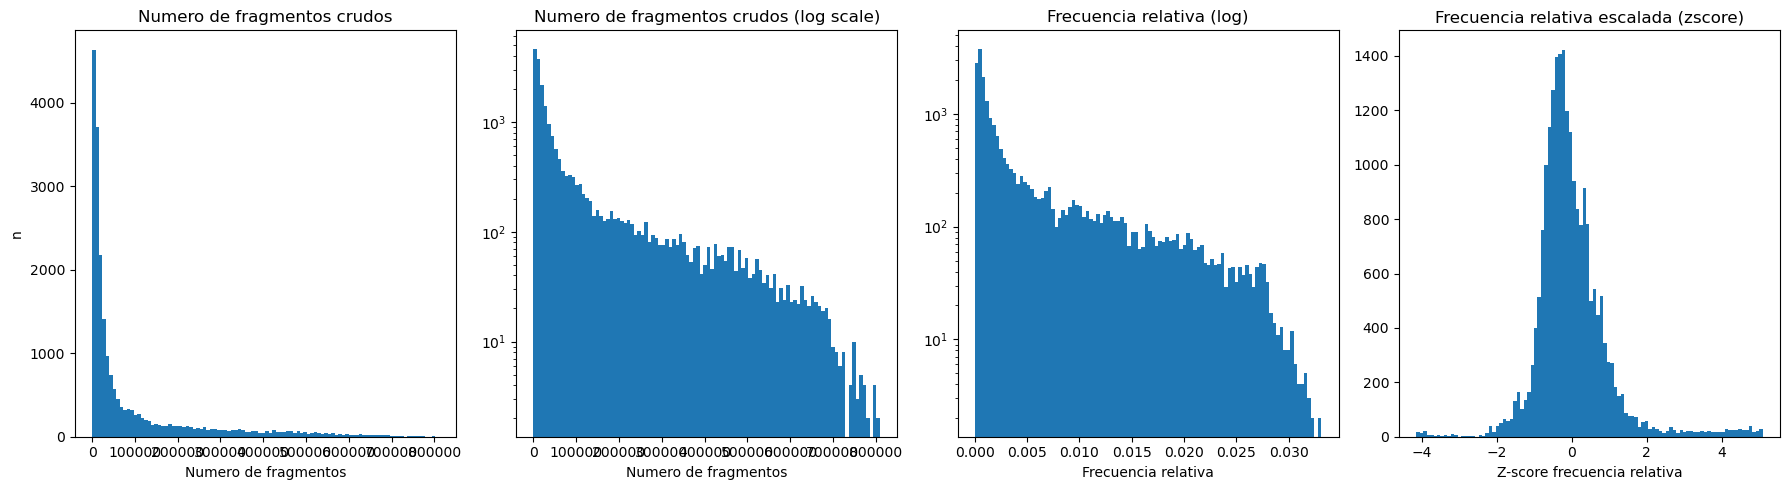

In [233]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=False)

axes[0].hist(
    df_fraglen["count"],
    bins=100
)

axes[0].set_title("Numero de fragmentos crudos")
axes[0].set_xlabel("Numero de fragmentos")
axes[0].set_ylabel("n")

axes[1].hist(
    df_fraglen["count"],
    bins=100,
    log=True
)

# log en frecuencias relativas
axes[1].set_title("Numero de fragmentos crudos (log scale)")
axes[1].set_xlabel("Numero de fragmentos")

axes[2].hist(
    df_fraglen["rel_freq"],
    bins=100,
    log=True
)

axes[2].set_title("Frecuencia relativa (log)")
axes[2].set_xlabel("Frecuencia relativa")

axes[3].hist(
    df_fraglen["scaled_freq"],
    bins=100
)

axes[3].set_xlabel("Z-score frecuencia relativa")
axes[3].set_title("Frecuencia relativa escalada (zscore)")

plt.tight_layout()
plt.show()

## PCA pre. vs post-QC

In [234]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# PCA-rel freqs
mat_fraglen = (
    df_fraglen
    .pivot_table(
        index=["sample", "qc"],
        columns="min",        # fragment length
        values="rel_freq",
        fill_value=0)
)
pca = PCA(n_components=2)
pcs = pca.fit_transform(mat_fraglen)

df_pca = (
    pd.DataFrame(pcs, columns=["PC1", "PC2"], index=mat_fraglen.index)
    .reset_index()
)
df_pca.head()

,sample,qc,PC1,PC2
0,10-CH_S5,post,0.012766,-0.014611
1,10-CH_S5,pre,0.012760,-0.014635
2,12-CH_S6,post,0.012324,-0.012645
3,12-CH_S6,pre,0.012325,-0.012673
4,2-CH_S1,post,-0.021316,0.028088


In [235]:
mat_fraglen_scaled = (
    df_fraglen
    .pivot_table(
        index=["sample", "qc"],
        columns="min",        # fragment length
        values="scaled_freq",
        fill_value=0)
)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(mat_fraglen_scaled)

df_pca_scaled = (
    pd.DataFrame(pcs, columns=["PC1", "PC2"], index=mat_fraglen_scaled.index)
    .reset_index()
)
df_pca_scaled.head()

,sample,qc,PC1,PC2
0,10-CH_S5,post,-6.280172,9.720016
1,10-CH_S5,pre,-6.270670,9.729166
2,12-CH_S6,post,-6.444985,7.806219
3,12-CH_S6,pre,-6.440481,7.815257
4,2-CH_S1,post,0.774564,-18.680985


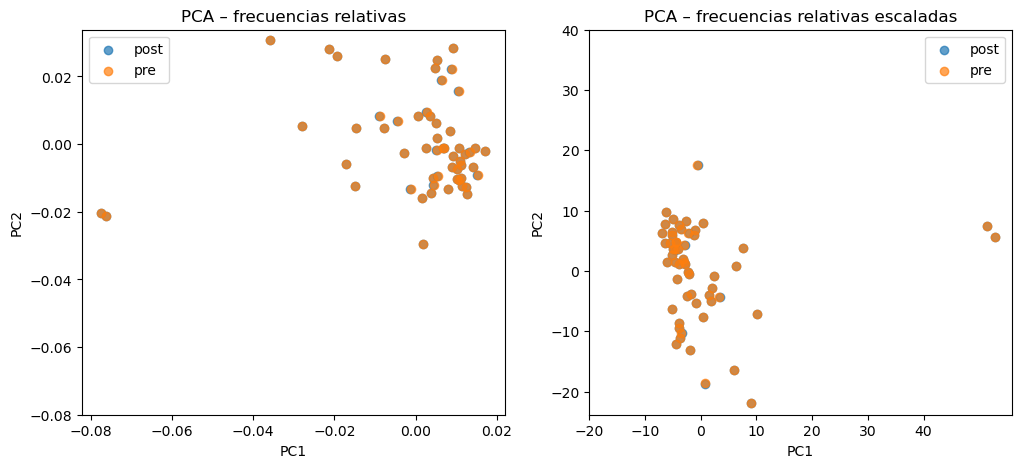

In [236]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# frecuencias relativas
for qc, g in df_pca.groupby("qc"):
    axes[0].scatter(g.PC1, g.PC2, label=qc, alpha=0.7)

axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_xticks(np.arange(-0.08, 0.03, 0.02))
axes[0].set_yticks(np.arange(-0.08, 0.03, 0.02))
axes[0].set_title("PCA – frecuencias relativas")
axes[0].legend()

# escalados
for qc, g in df_pca_scaled.groupby("qc"):
    axes[1].scatter(g.PC1, g.PC2, label=qc, alpha=0.7)

axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_xticks(np.arange(-20, 50, 10))
axes[1].set_yticks(np.arange(-20, 50, 10))
axes[1].set_title("PCA – frecuencias relativas escaladas")
axes[1].legend()

In [237]:
# outliers
df_pca_scaled.sort_values(by="PC1", ascending=False).head()

,sample,qc,PC1,PC2
14,CTRL-M-BL-CHUIMI_S7,post,52.859347,5.578969
15,CTRL-M-BL-CHUIMI_S7,pre,52.832767,5.606263
12,CTRL-F-BL-CHUIMI_S8,post,51.380720,7.445563
13,CTRL-F-BL-CHUIMI_S8,pre,51.360148,7.478077
90,L-25000080_S8,post,10.165339,-7.141910


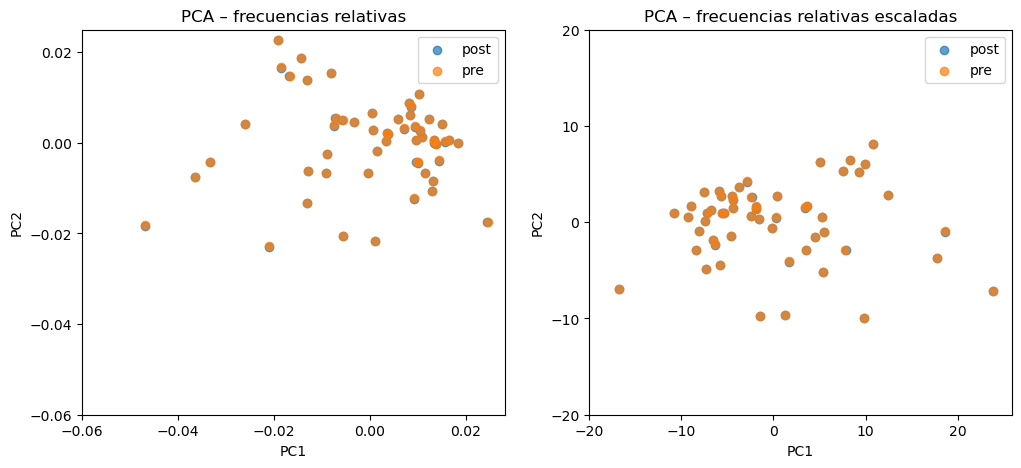

In [244]:
# excluding controls
ctrl_samples = ["CTRL-M-BL-CHUIMI_S7", "CTRL-F-BL-CHUIMI_S8"]

# exclude them
df_fraglen = df_fraglen[~df_fraglen["sample"].isin(ctrl_samples)]

# remake PCAs
mat_fraglen = (
    df_fraglen
    .pivot_table(
        index=["sample", "qc"],
        columns="min",        # fragment length
        values="rel_freq",
        fill_value=0)
)
pca = PCA(n_components=2)
pcs = pca.fit_transform(mat_fraglen)

df_pca = (
    pd.DataFrame(pcs, columns=["PC1", "PC2"], index=mat_fraglen.index)
    .reset_index()
)

# escalada
mat_fraglen_scaled = (
    df_fraglen
    .pivot_table(
        index=["sample", "qc"],
        columns="min",        # fragment length
        values="scaled_freq",
        fill_value=0)
)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(mat_fraglen_scaled)

df_pca_scaled = (
    pd.DataFrame(pcs, columns=["PC1", "PC2"], index=mat_fraglen_scaled.index)
    .reset_index()
)

# representar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# frecuencias relativas
for qc, g in df_pca.groupby("qc"):
    axes[0].scatter(g.PC1, g.PC2, label=qc, alpha=0.7)

axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_xticks(np.arange(-0.06, 0.03, 0.02))
axes[0].set_yticks(np.arange(-0.06, 0.03, 0.02))
axes[0].set_title("PCA – frecuencias relativas")
axes[0].legend()

# escalados
for qc, g in df_pca_scaled.groupby("qc"):
    axes[1].scatter(g.PC1, g.PC2, label=qc, alpha=0.7)

axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_xticks(np.arange(-20, 30, 10))
axes[1].set_yticks(np.arange(-20, 30, 10))
axes[1].set_title("PCA – frecuencias relativas escaladas")
axes[1].legend()

## PCA batch

In [239]:
dic_pool_muestras = {"POOL-551N": ["L-25000067", "L-25000081", "L-25000082", "L-25000092",
                                   "L-25000098", "L-25000089", "L-25000090", "L-25000091"],
                     
                     "POOL-496N": ["L-25000047", "L-25000057", "L-25000048", "L-25000049",
                                   "L-25000058", "L-25000051", "L-25000059", "L-25000061"],
                     
                     "POOL-401N": ["2-CH", "4-CH", "6-CH", "9-CH",
                                   "10-CH", "12-CH"#,
                                   #"CTRL-M-BL-CHUIMI", "CTRL-F-BL-CHUIMI"
                                  ],
                     
                     "POOL-473N": ["L-25000011", "L-25000023", "L-25000024", "L-25000015",
                                   "L-25000010", "L-25000020", "L-25000021", "L-25000022"],
                     
                     "POOL-479N": [#"ID1", "ID2", "ID3", "ID4", "ID5", "ID6", "ID7", "ID8",
                                   #"ID9", "ID10", "ID11", "ID12", "ID13", "ID14", "ID15", "ID16",
                                   #"ID17", "ID18", "ID19", "ID20", "ID21", "ID22", "ID23", "ID24",
                                   "ID25", "ID26", "ID27", "ID28", "ID29", "ID30", "ID31", "ID32"],
                     
                     "POOL-527N": ["L-25000063", "L-25000065", "L-25000069", "L-25000071",
                                   "L-25000076", "L-25000075", "L-25000066", "L-25000080"],
                     
                     "POOL-546N": ["L-25000007", "L-25000105", "L-25000038", "L-25000046",
                                   "L-25000026", "L-25000064", "L-25000086", "L-25000099"]
                    }

In [240]:
# lookup: muestra para cada pool
sample_to_pool = {
    # muestra ahora es key
    sample: pool
    # muestras es la lista
    for pool, samples in dic_pool_muestras.items()
    # para cada muestra de la lista - key value
    for sample in samples
}

#print(sample_to_pool)

In [243]:
df_fraglen['pool'] = df_fraglen['sample'].str.split("_").str[0].map(sample_to_pool)

print(df_fraglen.head())

# all ok! - no NA
df_fraglen["pool"].isna().any()

   min  max  count         sample    qc      rel_freq  scaled_freq       pool
0   65   65      4  L-25000049_S4  post  1.515868e-07    -0.854557  POOL-496N
1   66   66    870  L-25000049_S4  post  3.297013e-05    -0.677005  POOL-496N
2   67   67    987  L-25000049_S4  post  3.740405e-05    -0.639620  POOL-496N
3   68   68   1173  L-25000049_S4  post  4.445283e-05    -0.674418  POOL-496N
4   69   69  10416  L-25000049_S4  post  3.947321e-04     0.690074  POOL-496N


np.False_

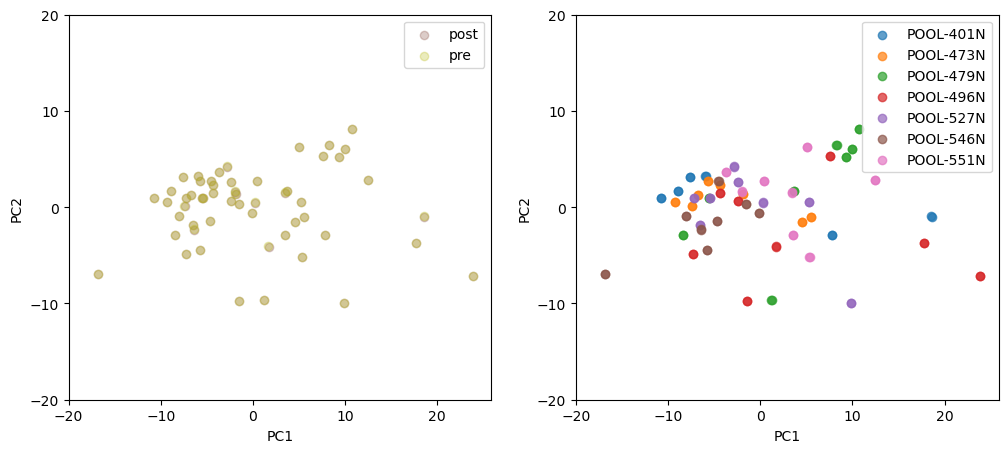

In [250]:
mat_fraglen = (
    df_fraglen
    .pivot_table(
        index=["sample", "qc", "pool"],
        columns="min",        # fragment length
        values="scaled_freq",
        fill_value=0)
)
pca = PCA(n_components=2)
pcs = pca.fit_transform(mat_fraglen)

df_pca = (
    pd.DataFrame(pcs, columns=["PC1", "PC2"], index=mat_fraglen.index)
    .reset_index()
)

# plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors_qc = {
    "pre": "tab:olive",
    "post": "tab:brown"
}


# escalados
for qc, g in df_pca_scaled.groupby("qc"):
    axes[0].scatter(g.PC1, g.PC2, 
                    label=qc, 
                    alpha=0.3,
                    color=colors_qc[qc])

axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_xticks(np.arange(-20, 30, 10))
axes[0].set_yticks(np.arange(-20, 30, 10))
#axes[0].set_title("PCA – frecuencias relativas escaladas")
axes[0].legend()

for pool, g in df_pca.groupby("pool"):
    axes[1].scatter(g.PC1, g.PC2, label=pool, alpha=0.7)

axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_xticks(np.arange(-20, 30, 10))
axes[1].set_yticks(np.arange(-20, 30, 10))
#ax.set_title("PCA – frecuencia escalada")
axes[1].legend()

plt.show()

# Análisis

## PCA colon vs NSCL

In [173]:
# datos colon Ivan
li = []

for filename in os.listdir("../UOC/TFM/00_datos/fragmentomics_colon_lesende"):
    # archivos histograma fraglen 
    if filename.endswith(".tsv") and 'histo' in filename:
        #print(filename)
        df = pd.read_csv(os.path.join("../UOC/TFM/00_datos/fragmentomics_colon_lesende", filename), 
                         index_col=None, 
                         sep='\t'
        )
        li.append(df)
        #print(df.head())
        # anyadir nombre archivo a columna
        filename = filename.split(".bam")[0]
        #print(filename)
        df['sample'] = filename
        
df_colon = pd.concat(li, axis=0, ignore_index=True)

df_colon["rel_freq"] = (
    df_colon["count"] /
    # suma numero total para cada muestra
    df_colon.groupby(["sample"])["count"].transform("sum")
)

df_colon["scaled_freq"] = (    
    # min-media/std
     (df_colon["rel_freq"]- df_colon.groupby("min")["rel_freq"].transform("mean")) / 
    df_colon.groupby("min")["rel_freq"].transform("std")
)

# anyadir colon
df_colon["tumor_type"] = "colon"

print(df_colon.head())

   min  max  count                 sample  rel_freq  scaled_freq tumor_type
0   50   51    420  histoCas4826cf-16colh  0.000028    -0.214863      colon
1   52   53    436  histoCas4826cf-16colh  0.000029    -0.236896      colon
2   54   55    566  histoCas4826cf-16colh  0.000037    -0.264358      colon
3   56   57    894  histoCas4826cf-16colh  0.000059    -0.271737      colon
4   58   59   1545  histoCas4826cf-16colh  0.000102    -0.273877      colon


In [129]:
# df NSCLC
print(df_fraglen.head())

   min  max  count         sample    qc      rel_freq  scaled_freq       pool
0   65   65      4  L-25000049_S4  post  1.515868e-07    -0.854557  POOL-496N
1   66   66    870  L-25000049_S4  post  3.297013e-05    -0.677005  POOL-496N
2   67   67    987  L-25000049_S4  post  3.740405e-05    -0.639620  POOL-496N
3   68   68   1173  L-25000049_S4  post  4.445283e-05    -0.674418  POOL-496N
4   69   69  10416  L-25000049_S4  post  3.947321e-04     0.690074  POOL-496N


In [205]:
#### combinar datos
df_nsclc = df_fraglen[df_fraglen['qc'] == 'post'].copy()

df_nsclc['tumor_type'] = 'NSCLC'

df_nsclc = df_nsclc[['min', 'max', 'count', 'sample', 'rel_freq', 'scaled_freq', 'tumor_type']]

# unir a colon
df_fraglen_all = pd.concat([df_nsclc, df_colon], ignore_index=True)

print(df_fraglen_all.head())

   min  max  count         sample      rel_freq  scaled_freq tumor_type
0   65   65      4  L-25000049_S4  1.515868e-07    -0.854557      NSCLC
1   66   66    870  L-25000049_S4  3.297013e-05    -0.677005      NSCLC
2   67   67    987  L-25000049_S4  3.740405e-05    -0.639620      NSCLC
3   68   68   1173  L-25000049_S4  4.445283e-05    -0.674418      NSCLC
4   69   69  10416  L-25000049_S4  3.947321e-04     0.690074      NSCLC


In [207]:
df_pca

,sample,tumor_type,PC1,PC2
0,10-CH_S5,NSCLC,-10.749316,1.466248
1,12-CH_S6,NSCLC,-9.024090,2.337054
2,2-CH_S1,NSCLC,18.081572,0.400204
3,4-CH_S2,NSCLC,7.593360,-1.650060
4,6-CH_S3,NSCLC,-7.483214,3.270006
...,...,...,...,...
70,histoSeraseq05,colon,-8.738914,-1.381162
71,histoSeraseq1(1),colon,-10.553598,-3.947654
72,histoSeraseq2-5,colon,-10.563956,-3.369382
73,histoSeraseqWT,colon,8.703296,-4.132297


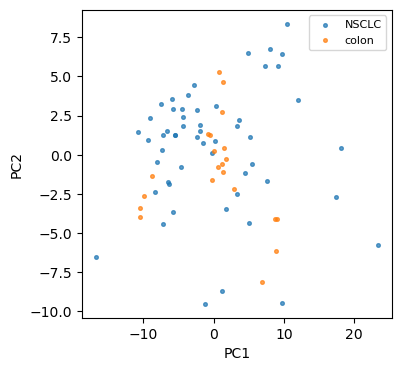

In [547]:
mat_fraglen_all = (
    df_fraglen_all.pivot_table(
        index=["sample", "tumor_type"],
        columns="min",        # fragment length
        values="scaled_freq",
        fill_value=0)
)
pca = PCA(n_components=2)
pcs = pca.fit_transform(mat_fraglen_all)

df_pca = (
    pd.DataFrame(pcs, columns=["PC1", "PC2"], index=mat_fraglen_all.index)
    .reset_index()
)

# plot
fig, ax = plt.subplots(figsize=(4, 4))

for tumor_type, g in df_pca.groupby("tumor_type"):
    ax.scatter(g.PC1, g.PC2, 
               label=tumor_type, 
               alpha=0.7,
                s = 7
              )

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
#ax.set_xticks(np.arange(-20, 30, 10))
#ax.set_yticks(np.arange(-20, 30, 10))
#ax.set_title("PCA – frecuencia escalada")
ax.legend(fontsize=8)

plt.show()

## Fragment length

In [176]:
df_perfil = (
    df_fraglen_all.groupby(["tumor_type", "min"], as_index=False)["count"].sum()
)

num_muestras_tumor = (
    df_fraglen_all[["sample", "tumor_type"]]
    .drop_duplicates()
    .groupby("tumor_type")
    .size()
)

print(num_muestras_tumor)

df_perfil["count_per_sample"] = (
    df_perfil["count"] /
    df_perfil["tumor_type"].map(num_muestras_tumor)
)

print(df_perfil.head())

tumor_type
NSCLC    54
colon    21
dtype: int64
  tumor_type  min  count  count_per_sample
0      NSCLC   50   2597         48.092593
1      NSCLC   51   4162         77.074074
2      NSCLC   52   4344         80.444444
3      NSCLC   53   4741         87.796296
4      NSCLC   54   5508        102.000000


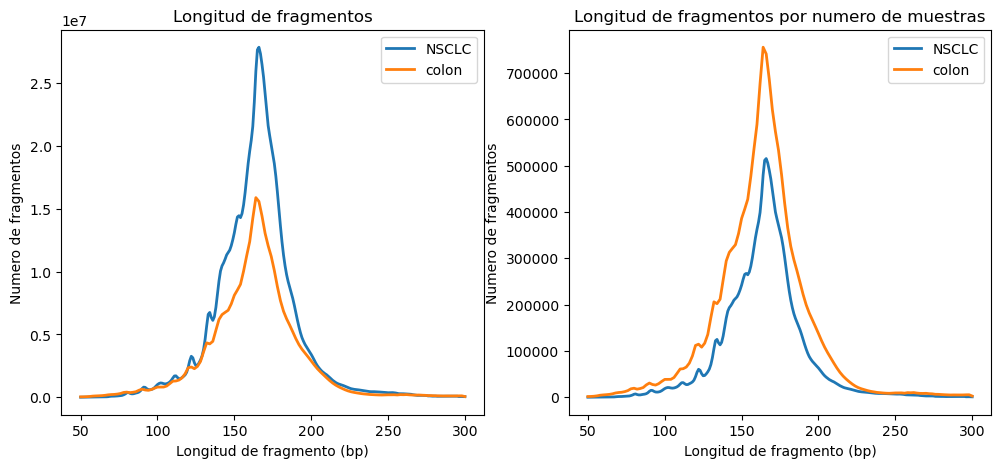

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for tumor, g in df_perfil.groupby("tumor_type"):
    g = g.sort_values("min")
    ax[0].plot(
        g["min"],
        g["count"],
        label=tumor,
        linewidth=2
    )

ax[0].set_xlabel("Longitud de fragmento (bp)")
ax[0].set_ylabel("Numero de fragmentos")
ax[0].set_title("Longitud de fragmentos")
ax[0].legend()

for tumor, g in df_perfil.groupby("tumor_type"):
    g = g.sort_values("min")
    ax[1].plot(
        g["min"],
        g["count_per_sample"],
        label=tumor,
        linewidth=2
    )

ax[1].set_xlabel("Longitud de fragmento (bp)")
ax[1].set_ylabel("Numero de fragmentos")
ax[1].set_title("Longitud de fragmentos por numero de muestras")
ax[1].legend()

plt.show()

In [188]:
df_perfil.head()

,tumor_type,min,count,count_per_sample
0,NSCLC,50,2597,48.092593
1,NSCLC,51,4162,77.074074
2,NSCLC,52,4344,80.444444
3,NSCLC,53,4741,87.796296
4,NSCLC,54,5508,102.000000


['NSCLC (mean = 164.4 bp)', 'colon (mean = 163.1 bp)']


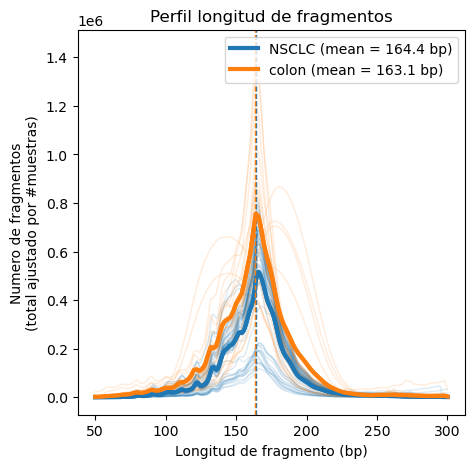

In [251]:
colors_tumor = {
    "NSCLC": "tab:blue",
    "colon": "tab:orange"
}

# perfil por muestra
df_perfil_sample = (
    df_fraglen_all
    .groupby(["tumor_type", "sample", "min"], as_index=False)["count"]
    .sum()
)

# media longitud de fragmentos
mean_fraglen = (
    df_perfil_sample
    .groupby("tumor_type")
    .apply(lambda g: np.average(g["min"], weights=g["count"]), include_groups=False)
)

legend_labels = []

for tumor, x in mean_fraglen.items():
    legend_labels.append(f"{tumor} (mean = {x:.1f} bp)")

print(legend_labels)

fig, ax = plt.subplots(figsize=(5, 5))

# perfil por muestra
for (tumor, sample), g in df_perfil_sample.groupby(["tumor_type", "sample"]):
    g = g.sort_values("min")
    ax.plot(
        g["min"],
        g["count"],
        color=colors_tumor[tumor],
        alpha=0.15,       # faint
        linewidth=1
    )

# perfil medio por tumor (ajustado a numero de muestras)
for tumor, g in df_perfil.groupby("tumor_type"):
    g = g.sort_values("min")
    ax.plot(
        g["min"],
        g["count_per_sample"],
        color=colors_tumor[tumor],
        linewidth=3,
        label="_nolegend_"
    )

# lineas media longitud fragmento
for tumor, g in df_perfil.groupby("tumor_type"):
    g = g.sort_values("min")
    ax.plot(
        g["min"],
        g["count_per_sample"],
        color=colors_tumor[tumor],
        linewidth=3,
        label=f"{tumor} (mean = {mean_fraglen[tumor]:.1f} bp)"
    )

    ax.axvline(
        mean_fraglen[tumor],
        color=colors_tumor[tumor],
        linestyle="--",
        linewidth=1,
        label="_nolegend_"
    )

ax.set_xlabel("Longitud de fragmento (bp)")
ax.set_ylabel("Numero de fragmentos\n(total ajustado por #muestras)")
ax.set_title("Perfil longitud de fragmentos")
ax.legend()

plt.show()

## PENDING Fragments per chromosome

In [ ]:
#from finaletoolkit import fragment_count

#fragment_count(
    # bam needed
#    input_file=os.path.join(results_endmot, "2-CH_S1.filtered.tsv"),
#    output_file="fragment_counts.tsv",
#    by_chrom=True                  # ← clave para agrupar por cromosoma
#)

## End-motifs

In [338]:
# dataset con ambos
path_endmot_nsclc = os.path.join(results_endmot, "*.filtered.k4.tsv") 
path_endmot_colon = "../UOC/TFM/00_datos/fragmentomics_colon_lesende/*.tsv"
# hay que especificar los archivos de 4-mer (histo-fraglen y 2-2mer)
# if not os.path.basename(f).startswith(("histo", "2"))

# datos k=4 NSCLC
li = []

for filename in glob.glob(path_endmot_nsclc):
    samplename = re.sub(r'\.(bam\.tsv|filtered\.k4\.tsv)$', '', os.path.basename(filename))

    # archivos 4mer 
    #print(filename)
    df = pd.read_csv(filename, 
                     index_col=None,
                     names=["motif","freq"],
                     sep='\t')
    li.append(df)
    # anyadir nombre archivo a columna
    filename = filename.split(".bam")[0]
    df['sample'] = samplename
    df['cancer_type'] = "NSCLC"
    #print(df.head())
        
df_nsclc = pd.concat(li, axis=0, ignore_index=True)

print(df_nsclc.head())

  motif      freq         sample cancer_type
0  AAAA  0.010040  L-25000063_S1       NSCLC
1  AAAC  0.003083  L-25000063_S1       NSCLC
2  AAAG  0.004791  L-25000063_S1       NSCLC
3  AAAT  0.004994  L-25000063_S1       NSCLC
4  AACA  0.003264  L-25000063_S1       NSCLC


In [337]:
# datos colon
li = []

for filename in glob.glob(path_endmot_colon):
    samplename = re.sub(r'\.(bam\.tsv|filtered\.k4\.tsv)$', '', os.path.basename(filename))
    if samplename.startswith(("histo", "2")):
        continue
    # archivos 4mer 
    #print(filename)
    df = pd.read_csv(filename, 
                     index_col=None,
                     names=["motif","freq"],
                     sep='\t')
    li.append(df)
    # anyadir nombre archivo a columna
    filename = filename.split(".bam")[0]
    df['sample'] = samplename
    df['cancer_type'] = "colon"
    #print(df.head())
        
df_colon = pd.concat(li, axis=0, ignore_index=True)

print(df_colon.head())

  motif      freq        sample cancer_type
0  AAAA  0.009084  Cas5068cf(1)       colon
1  AAAC  0.002977  Cas5068cf(1)       colon
2  AAAG  0.005362  Cas5068cf(1)       colon
3  AAAT  0.004388  Cas5068cf(1)       colon
4  AACA  0.003822  Cas5068cf(1)       colon


In [354]:
df_endmot_all = pd.concat([df_nsclc, df_colon], ignore_index=True)

df_endmot_all = df_endmot_all[~df_endmot_all["sample"].isin(ctrl_samples)]

print(df_endmot_all["cancer_type"].value_counts())

cancer_type
NSCLC    13824
colon     5376
Name: count, dtype: int64


In [365]:
df_endmot_all['freq'].min()

1.9567670756997536e-05

In [350]:
heat_matrix = df_endmot_all.pivot(index="motif", columns="sample", values="freq")
print(heat_matrix.head())

sample  10-CH_S5  12-CH_S6   2-CH_S1   4-CH_S2   6-CH_S3   9-CH_S4  \
motif                                                                
AAAA    0.010069  0.009915  0.011499  0.010979  0.010008  0.010312   
AAAC    0.003166  0.003287  0.004026  0.003868  0.004053  0.003165   
AAAG    0.004326  0.004539  0.005685  0.005560  0.005553  0.004335   
AAAT    0.004888  0.005142  0.007421  0.006828  0.006736  0.004891   
AACA    0.003541  0.003669  0.004189  0.004054  0.004329  0.003494   

sample  CTRL-F-BL-CHUIMI_S8  CTRL-M-BL-CHUIMI_S7  Cas4684cf-9colh  \
motif                                                               
AAAA               0.007490             0.005889         0.009811   
AAAC               0.001566             0.001577         0.003663   
AAAG               0.002659             0.002737         0.005972   
AAAT               0.003498             0.003279         0.004729   
AACA               0.002165             0.002130         0.004782   

sample  Cas4814cf-18colh 

/Users/sarasuarez/miniconda3/envs/fragmentomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


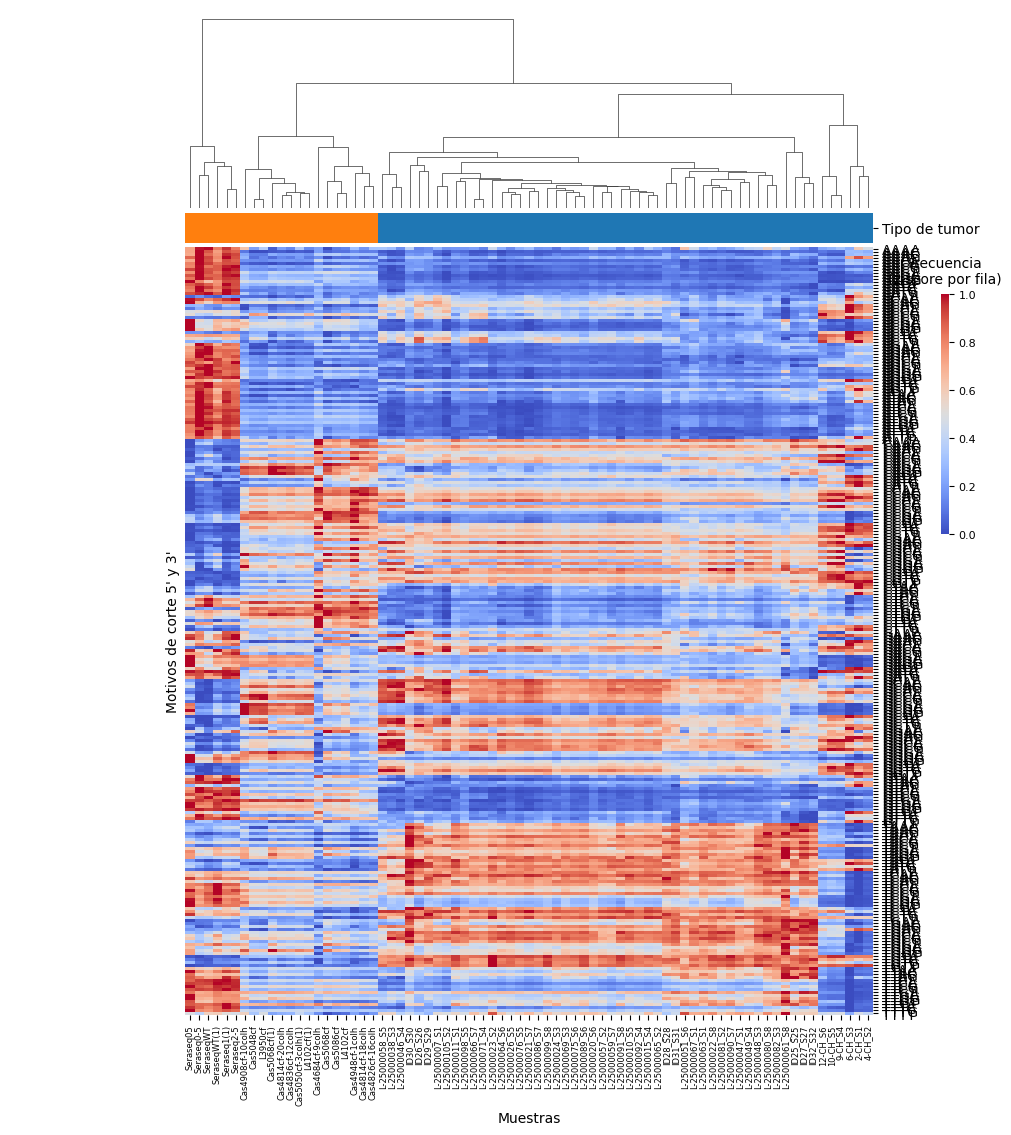

In [549]:
# heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# matrix
heat_matrix = df_endmot_all.pivot(index="motif", columns="sample", values="freq")

# color
colors_tumor = {
    "NSCLC": "tab:blue",
    "colon": "tab:orange"
}
col_colors = df_endmot_all.drop_duplicates("sample").set_index("sample")["cancer_type"].map(colors_tumor)
# leyenda
col_colors.name = "Tipo de tumor"

# clustered heatmap
heat = sns.clustermap(
    heat_matrix,
    col_cluster=True,        # dendrogram for samples
    row_cluster=False,        # can disable if rows too many: row_cluster=False
    col_colors=col_colors,
    cmap="coolwarm",
    standard_scale=0,        # normalizar filas (max freq = 1 vs min freq = 0)
    figsize=(10,12),
    xticklabels=True,
    yticklabels=False
    #cbar_kws={"shrink": 0.2}
)

heat.ax_heatmap.tick_params(axis='x', labelsize=6)
heat.ax_heatmap.yaxis.set_label_position("left")
heat.ax_heatmap.set_ylabel("Motivos de corte 5' y 3'")
heat.ax_heatmap.set_xlabel("Muestras")

# leyenda
heat.ax_cbar.set_aspect(30)
heat.ax_cbar.set_position([0.85, 0.55, 0.2, 0.2]) 
heat.ax_cbar.tick_params(labelsize=8)
heat.ax_cbar.set_title("Frecuencia\n(z-score por fila)", fontsize=10, pad=8)

plt.show()

/var/folders/3n/cmq87plj5zx43b8bbf_fdhth0000gp/T/ipykernel_9769/4021786286.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
/var/folders/3n/cmq87plj5zx43b8bbf_fdhth0000gp/T/ipykernel_9769/4021786286.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
/var/folders/3n/cmq87plj5zx43b8bbf_fdhth0000gp/T/ipykernel_9769/4021786286.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
/var/folders/3n/cmq87plj5zx43b8bbf_fdhth0000gp/T/ipykernel_9769/4021786286.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

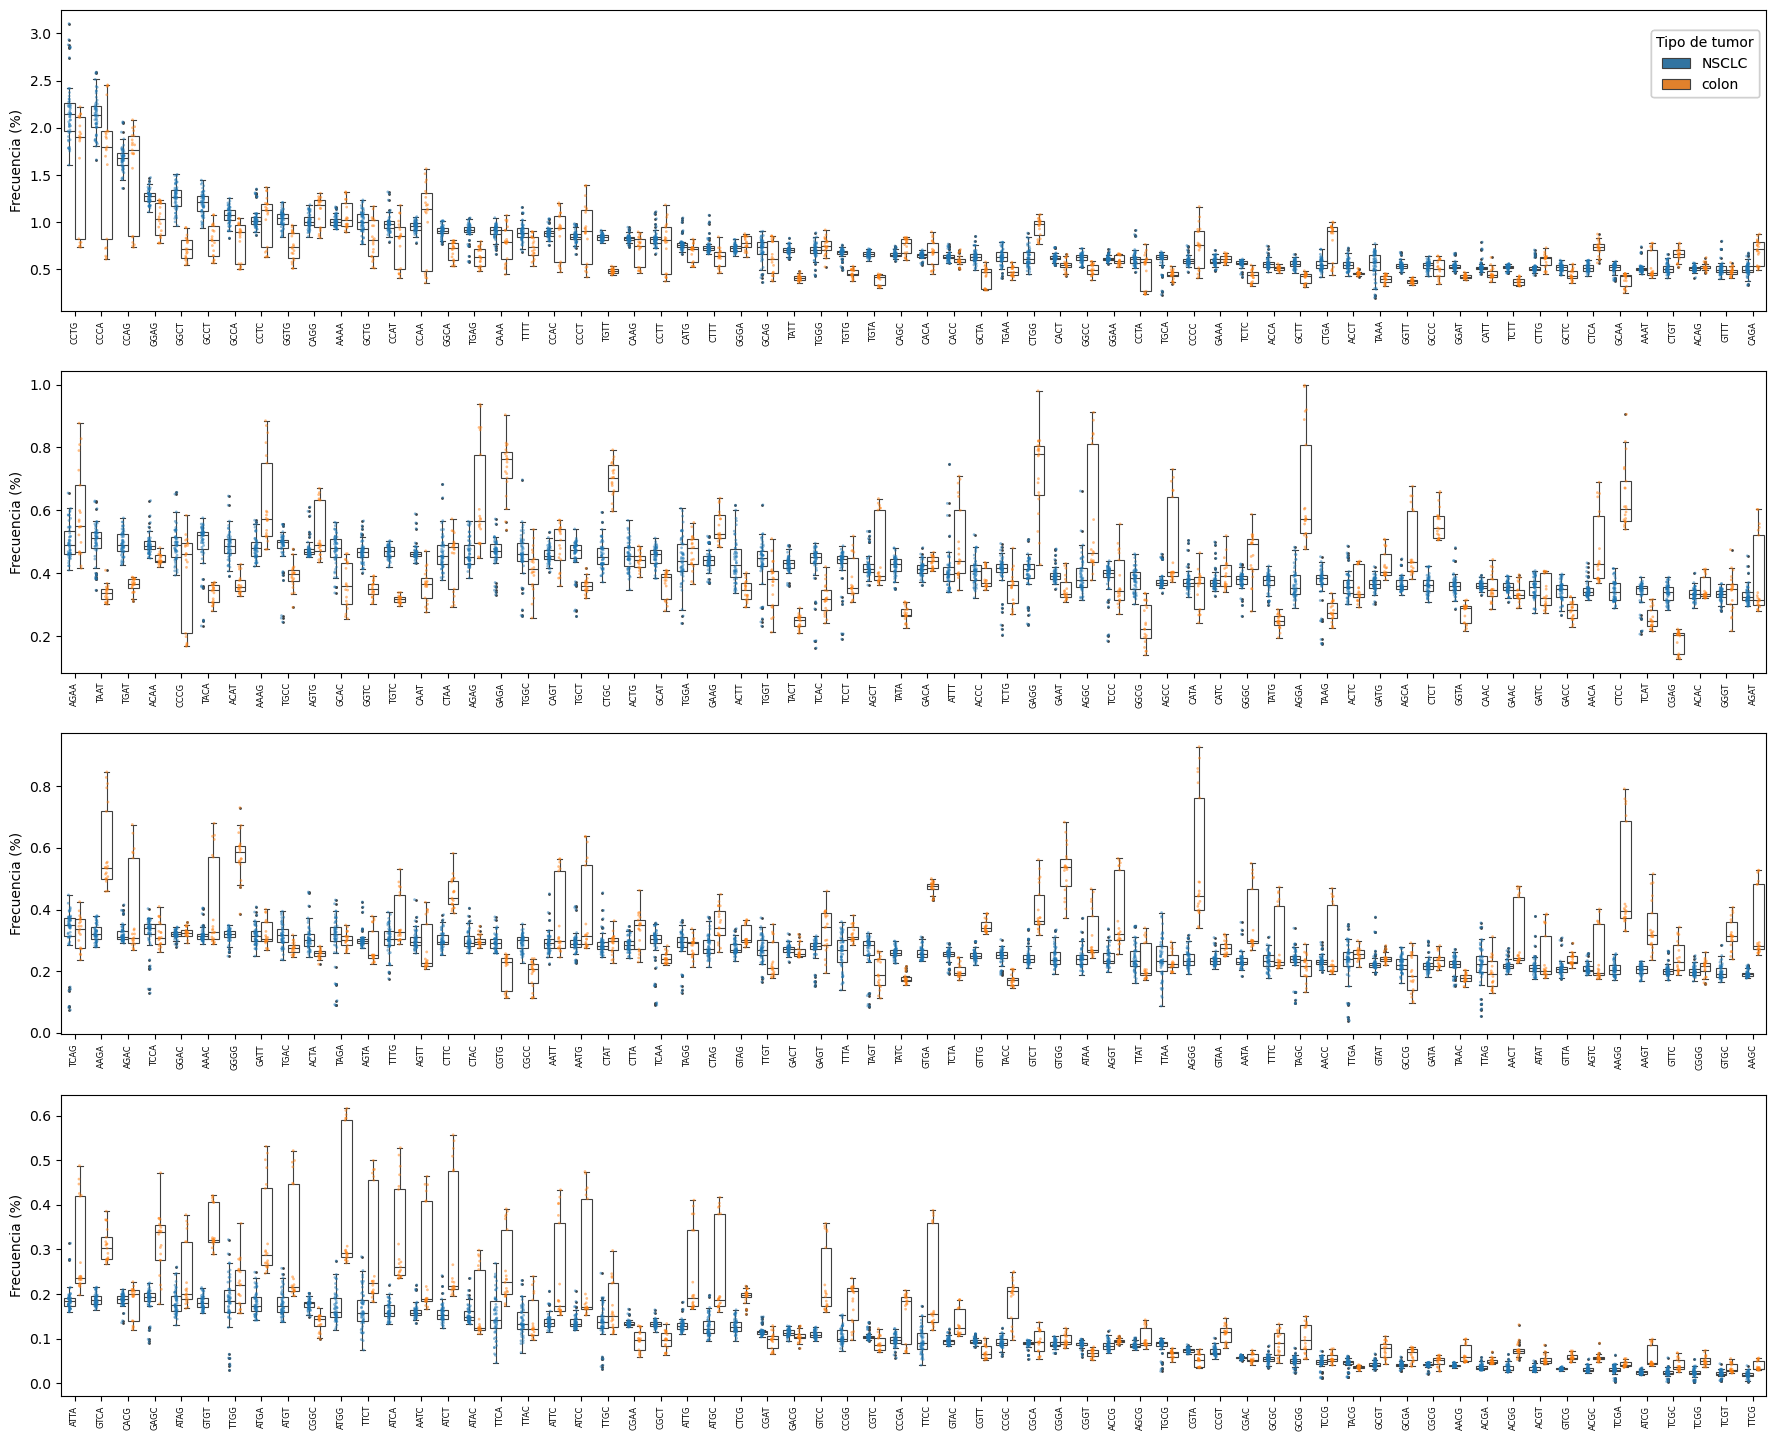

In [505]:
# boxplot motivos diferentes colon vs NSCLC
# porcentaje
df_endmot_all['percent'] = df_endmot_all['freq']*100

# ordenar decreciente frecuencia NSCLC
order = (df_endmot_all[df_endmot_all["cancer_type"]=="NSCLC"]
         .groupby("motif")["freq"]
         .mean()
         .sort_values(ascending=False)
         .index.tolist())

# Split into 4 chunks of 64 motifs each
chunks = [order[i:i+64] for i in range(0, len(order), 64)]

fig, axes = plt.subplots(4, 1, figsize=(22,18), sharey=False)

for ax, subset in zip(axes, chunks):
    df_sub = df_endmot_all[df_endmot_all["motif"].isin(subset)]

    sns.boxplot(data=df_sub,
                x="motif", 
                y="percent",
                hue="cancer_type",
                order=subset,
                ax=ax,
                boxprops=dict(facecolor="none"),
                fliersize=1,
                linewidth=0.8)

    sns.stripplot(data=df_sub,
                  x="motif", 
                  y="percent", 
                  hue="cancer_type",
                  order=subset, 
                  ax=ax,
                  dodge=True,            # aligns with boxplot groups
                  jitter=True,
                  alpha=0.5,             # transparent dots
                  size=2
                 )
    
    ax.legend_.remove()

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles[:2], 
               labels[:2], 
               title="Tipo de tumor",
               loc="right",
               bbox_to_anchor=(0.9,0.85)
              )

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia (%)")

In [465]:
from scipy.stats import mannwhitneyu

results = []

for motif in df_endmot_all["motif"].unique():
    nsclc_vals = df_endmot_all[(df_endmot_all.motif == motif) & 
                               (df_endmot_all.cancer_type == "NSCLC")]["percent"]
    colon_vals = df_endmot_all[(df_endmot_all.motif == motif) & 
                               (df_endmot_all.cancer_type == "colon")]["percent"]

    mean_n = nsclc_vals.mean()
    mean_c = colon_vals.mean()
    
    # real fold change (ratio)
    foldchange = mean_n / mean_c if mean_c > 0 else np.nan
    
    # log2FC (better for volcano plots)
    #log2FC = np.log2(foldchange) if foldchange > 0 else np.nan
    
    # stats
    stat, p = mannwhitneyu(nsclc_vals, colon_vals, alternative='two-sided')
    
    results.append([motif, mean_n, mean_c, foldchange, 
                    #log2FC, 
                    p])

df_stats = pd.DataFrame(results, 
                        columns=["motif","mean_nsclc","mean_colon",
                                 "foldchange",
                                 #"log2FC",
                                 "p_value"])

In [478]:
# corrijo p-value por test multiples
from statsmodels.stats.multitest import multipletests

df_stats["FDR"] = multipletests(df_stats["p_value"], method="fdr_bh")[1]

df_stats.head()

,motif,mean_nsclc,mean_colon,foldchange,p_value,FDR
0,AAAA,1.009157,1.068374,0.944574,4.536813e-01,4.645697e-01
1,AAAC,0.318038,0.403813,0.787588,8.386616e-02,9.499883e-02
2,AAAG,0.481322,0.622372,0.773367,6.293987e-08,1.389018e-07
3,AAAT,0.512828,0.538034,0.953151,2.458412e-02,3.100264e-02
4,AACA,0.346179,0.470800,0.735299,9.461825e-10,2.883604e-09


In [484]:
# elegir 6 motivos representativos (3 NSCLC>colon (FC>1) vs 3 NSCLC<colon (FC<1) maximizando las medias)
# stat. signif
print(df_stats[df_stats["FDR"] < 0.05].sort_values(by=['mean_nsclc', 'foldchange'], ascending=False).head(n=6))

print(df_stats[df_stats["FDR"] < 0.05].sort_values(by=['foldchange', 'mean_colon'], ascending=True).head(n=6))

    motif  mean_nsclc  mean_colon  foldchange       p_value           FDR
94   CCTG    2.168198    1.643941    1.318903  1.969790e-04  3.151665e-04
84   CCCA    2.132021    1.623708    1.313057  3.419396e-04  5.305245e-04
162  GGAG    1.272798    1.029240    1.236639  2.469056e-08  5.798884e-08
167  GGCT    1.263953    0.726041    1.740883  2.315127e-11  1.743154e-10
151  GCCT    1.200943    0.809702    1.483191  2.261672e-10  8.514528e-10
148  GCCA    1.069381    0.814546    1.312855  1.245062e-08  3.035581e-08
    motif  mean_nsclc  mean_colon  foldchange       p_value           FDR
54   ATCG    0.024132    0.057446    0.420078  2.315127e-11  1.743154e-10
10   AAGG    0.207711    0.481995    0.430939  2.315127e-11  1.743154e-10
42   AGGG    0.239673    0.542513    0.441782  2.315127e-11  1.743154e-10
26   ACGG    0.033625    0.075695    0.444220  3.457745e-11  2.011779e-10
218  TCGG    0.022773    0.050580    0.450239  1.219943e-10  5.119759e-10
58   ATGG    0.171198    0.377035    0

In [490]:
df_endmot_all[df_endmot_all["motif"] in rep_motifs]

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (2037812914.py, line 1)

/var/folders/3n/cmq87plj5zx43b8bbf_fdhth0000gp/T/ipykernel_9769/864542095.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
/var/folders/3n/cmq87plj5zx43b8bbf_fdhth0000gp/T/ipykernel_9769/864542095.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)


[Text(0, 0, 'CCTG'),
 Text(1, 0, 'CCCA'),
 Text(2, 0, 'GGAG'),
 Text(3, 0, 'AAGG'),
 Text(4, 0, 'AGGG'),
 Text(5, 0, 'ATGG')]

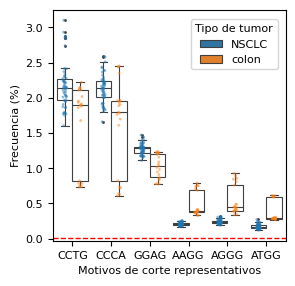

In [539]:
# motivos seleccionados
rep_motifs = ['CCTG', 'CCCA', 'GGAG',
              'AAGG', 'AGGG', 'ATGG'
             ]

fig, ax = plt.subplots(figsize=(3, 3))

sns.boxplot(data=df_endmot_all[df_endmot_all["motif"].isin(rep_motifs)],
            ax = ax,
            x="motif",
            y="percent",
            hue="cancer_type",
            order=rep_motifs,
            boxprops=dict(facecolor="none"),
            fliersize=1,
            linewidth=0.8)

sns.stripplot(data=df_endmot_all[df_endmot_all["motif"].isin(rep_motifs)],
              ax = ax,
              x="motif",
              y="percent", 
              hue="cancer_type",
              order=rep_motifs,
              dodge=True,
              jitter=True,
              alpha=0.5,
              size=2) 

ax.legend_.remove()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2],
          labels[:2],
          title="Tipo de tumor",
          loc="right",
          bbox_to_anchor=(0.99,0.85),
          title_fontsize=8,
          fontsize=8
          )

ax.axhline(y=0.0039, color='r', linestyle='--', linewidth = 1)

ax.set_ylabel("Frecuencia (%)", fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

ax.set_xlabel("Motivos de corte representativos", fontsize=8)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)

### MDS

* Al tener ya los archivos .tsv para los motivos de corte de colon, no aplique el siguiente codigo en Python descrito en la documentacion de FinaleToolkit https://github.com/epifluidlab/FinaleToolkit/wiki/3c3d

* Para calcular el MDS, utilizo la formula de la entropia de Shannon normalizada que emplea Finaletoolkit descrita en https://aacrjournals.org/cancerdiscovery/article/10/5/664/2457/Plasma-DNA-End-Motif-Profiling-as-a-Fragmentomic

In [304]:
# algun archivo con freq=0?
# NSCLC - no 0
path = os.path.join(results_endmot, "*.filtered.k4.tsv")  # adjust to your directory

# colon - no o
#path = "../UOC/TFM/00_datos/fragmentomics_colon_lesende/*.tsv"

files_with_zero = []

for f in glob.glob(path):
    df = pd.read_csv(f, sep="\t", header=None, names=["motif","freq"])
    
    # ver si algun motivo - freq=0
    if (df["freq"] == 0).any():
        files_with_zero.append(os.path.basename(f))

# imprimir si hay 0s o si no
if files_with_zero:
    print("Files containing frequency = 0:")
    for file in files_with_zero:
        print(" -", file)
else:
    print("No files contain frequency = 0")

No files contain frequency = 0


In [319]:
# funcion para calcular MDS en NSCLS y colon
import re
import math

path_endmot_nsclc = os.path.join(results_endmot, "*.filtered.k4.tsv") 
path_endmot_colon = "../UOC/TFM/00_datos/fragmentomics_colon_lesende/*.tsv"
# hay que especificar los archivos de 4-mer (histo-fraglen y 2-2mer)
# if not os.path.basename(f).startswith(("histo", "2"))
k = 4
max_entropy = math.log2(4**k)

# Container list for all results
records = []

def compute_MDS(file, cancer_type):
    samplename = re.sub(r'\.(bam\.tsv|filtered\.k4\.tsv)$', '', os.path.basename(file))
    df = pd.read_csv(file, sep="\t", header=None, names=["motif","freq"])

    p = df["freq"].values
    h = -np.sum(p * np.log2(p)) # entropia
    mds_norm = h / max_entropy

    # store result for final dataframe
    records.append([samplename, mds_norm, cancer_type])

for f in glob.glob(path_endmot_nsclc):
    compute_MDS(f, "NSCLC")

for f in glob.glob(path_endmot_colon):
    samplename = os.path.basename(f)
    if samplename.startswith(("histo", "2")):
        continue
    compute_MDS(f, "colon")

df_mds = pd.DataFrame(records, columns=["sample", "mds", "cancer_type"])

In [320]:
print(df_mds)

              sample       mds cancer_type
0      L-25000063_S1  0.955832       NSCLC
1            2-CH_S1  0.941417       NSCLC
2      L-25000090_S7  0.954018       NSCLC
3      L-25000066_S7  0.950604       NSCLC
4      L-25000057_S2  0.950554       NSCLC
..               ...       ...         ...
72        L4102cf(1)  0.957343       colon
73         SeraseqWT  0.968488       colon
74  Cas4814cf-18colh  0.949667       colon
75       Seraseq1(1)  0.970913       colon
76  Cas4826cf-16colh  0.951889       colon

[77 rows x 3 columns]


# TO-DO

## Procesado de datos:
- [x] Run POOL-527N
- [x] Running: POOL-473
- [x] Run las demas
- [x] script (o ver si hay funcion en Finaletoolkit) para QC bam files -> que todas las muestras limpias (ver regla frag anterior. Entre otras excluyando lecturas duplicadas) vayan a carpeta datos/ (y te quitas de iterar por POOLs que a estar alturas deberian darte igual porque no sabes que es que)

## Resultados:
- [x] Histogram fragmentos overlap con dup vs sin dup-noUMI vs sin dup-UMI a ver como cambia.
- [ ] Probar bam file fragmentos por cromosoma
- [ ] Excel estadistica en repositorio

## Otros:
- [ ] redactar snakefile en metodos como https://github.com/epifluidlab/finaledb_workflow
- [ ] revisar comando HPC y especificar en metodos que corrido POOL per POOL por revisar errorer (tiempo de computacion aprox) - puede estar mas automatizado
- [ ] completar snakefile con regla bcl2fastq
- [ ] end motifs
- [ ] actualizar readme con como instalar y hacer el pipeline desde Illumina -> notebook? outputs?